In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('employe.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [56]:
df.satisfaction_level = df.satisfaction_level*100
df['last_evaluation'] = df['last_evaluation']*100


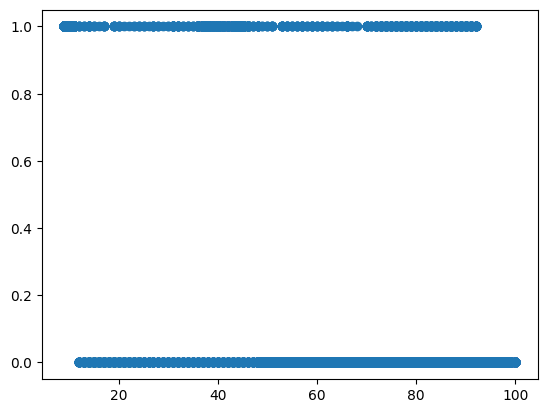

In [62]:
%matplotlib inline
plt.scatter(df['satisfaction_level'],df['left'])


In [58]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,x_test,Y_train,y_test = train_test_split(df[['satisfaction_level']],df['left'],train_size=0.1)
x_test

,satisfaction_level
10566,72.0
5406,73.0
4370,90.0
3928,70.0
10700,52.0
...,...
8656,32.0
8459,83.0
11324,23.0
14178,82.0


In [68]:

model = LogisticRegression()

In [69]:
model.fit(X_train,Y_train)

LogisticRegression()

In [70]:
emp_retain = [model.score(x_test,y_test)]

0.7661481481481481

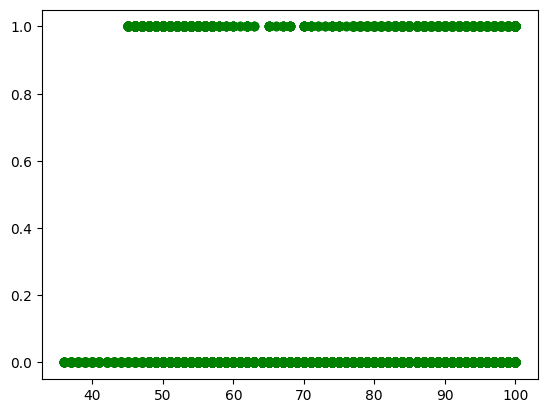

In [71]:
%matplotlib inline 
plt.scatter(df['last_evaluation'],df['left'],color='green')

In [73]:
def find_emp_detention(x,y):
  X_train,x_test,Y_train,y_test = train_test_split(df[[x]],df[y],test_size=0.5)
  model = LogisticRegression()
  model.fit(X_train,Y_train)
  pred = model.score(x_test,y_test)
  return pred

In [74]:
fac=find_emp_detention('satisfaction_level','left')
fac

0.76

In [79]:
column = np.array(df.columns)
column = column[column != 'left']
column

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'], dtype=object)

In [81]:
len = len(column)
len

9

In [89]:
score =np.array([])
for i in range(len-1):
  pred_value = find_emp_detention(column[i],'left')
  print(pred_value)
  # score = np.append(score,pred_value)

# score

0.7645333333333333
0.7602666666666666
0.7654666666666666
0.7610666666666667
0.7477333333333334
0.7641333333333333
0.7617333333333334


ValueError: ignored